In [2]:
import pandas as pd
import numpy as np
import scipy.stats
from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns

# 3.2 Types of Data in Statistics

## 3.2.1 Categorical Data

In [7]:
weather_df = pd.DataFrame({
    'temp': [55, 34, 80, 75, 53],
    'weather': ['windy', 'cloudy', 'sunny', 'rain', 'sunny']
})

weather_df

,temp,weather
0,55,windy
1,34,cloudy
2,80,sunny
3,75,rain
4,53,sunny


In [8]:
weather_df['weather_encoded'] = weather_df['weather'].map({'windy': 0, 'cloudy': 1, 'sunny': 2, 'rain': 3})
weather_df

,temp,weather,weather_encoded
0,55,windy,0
1,34,cloudy,1
2,80,sunny,2
3,75,rain,3
4,53,sunny,2


In [9]:
pd.get_dummies(weather_df['weather'])

,cloudy,rain,sunny,windy
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


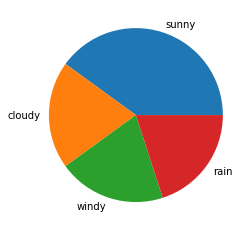

In [12]:
weather_df['weather'].value_counts().plot.pie()
plt.ylabel('')
plt.show()

In [13]:
student_df = pd.DataFrame({
    'name': ['Alice', 'Bob', 'Carol', 'Dan', 'Eli', 'Fran'],
    'gender': ['female', 'male', 'female', 'male', 'male', 'female'],
    'class': ['FY', 'SO', 'SR', 'SO', 'JR', 'SR'],
    'gpa': [90, 93, 97, 89, 95, 92],
    'num_classes': [4, 3, 4, 4, 3, 2]
})
student_df

,name,gender,class,gpa,num_classes
0,Alice,female,FY,90,4
1,Bob,male,SO,93,3
2,Carol,female,SR,97,4
3,Dan,male,SO,89,4
4,Eli,male,JR,95,3
5,Fran,female,SR,92,2


In [14]:
student_df['female_flag'] = student_df['gender'] == 'female'
student_df = student_df.drop('gender', axis=1)
student_df

,name,class,gpa,num_classes,female_flag
0,Alice,FY,90,4,True
1,Bob,SO,93,3,False
2,Carol,SR,97,4,True
3,Dan,SO,89,4,False
4,Eli,JR,95,3,False
5,Fran,SR,92,2,True


## 3.2.2 Numerical Data

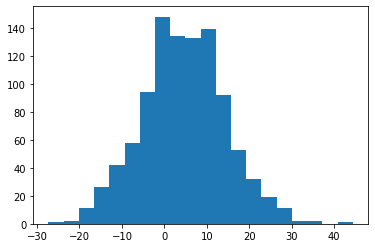

In [9]:
samples = np.random.normal(4, 10, size=1000)

plt.hist(samples, bins=20)
plt.show()

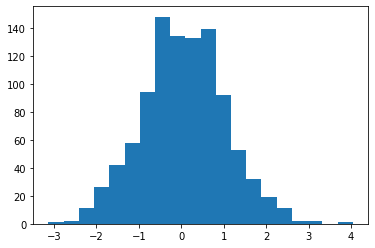

In [12]:
normalized_samples = (samples - 4) / 10

plt.hist(normalized_samples, bins=20)
plt.show()

In [10]:
sample_mean = np.mean(samples)
sample_sd = np.std(samples)

sample_mean, sample_sd

(4.594141346647613, 9.81612706448226)

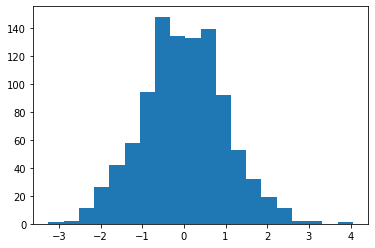

In [11]:
normalized_samples = (samples - sample_mean) / sample_sd

plt.hist(normalized_samples, bins=20)
plt.show()

# 3.3 Descriptive Statistics

## Python-Related Descriptive Statistics

In [2]:
df = pd.DataFrame({
    'numerical': np.random.normal(size=5),
    'categorical': ['a', 'b', 'a', 'c', 'b'],
    'ordinal': [1, 2, 3, 5, 4]
})

df

,numerical,categorical,ordinal
0,-0.824727,a,1
1,-0.192838,b,2
2,-0.462354,a,3
3,1.250964,c,5
4,-1.027348,b,4


In [3]:
df.describe()

,numerical,ordinal
count,5.000000,5.000000
mean,-0.251261,3.000000
std,0.899420,1.581139
min,-1.027348,1.000000
25%,-0.824727,2.000000
50%,-0.462354,3.000000
75%,-0.192838,4.000000
max,1.250964,5.000000


In [4]:
df.describe(include='all')

,numerical,categorical,ordinal
count,5.000000,5,5.000000
unique,NaN,3,NaN
top,NaN,a,NaN
freq,NaN,2,NaN
mean,-0.251261,NaN,3.000000
std,0.899420,NaN,1.581139
min,-1.027348,NaN,1.000000
25%,-0.824727,NaN,2.000000
50%,-0.462354,NaN,3.000000
75%,-0.192838,NaN,4.000000


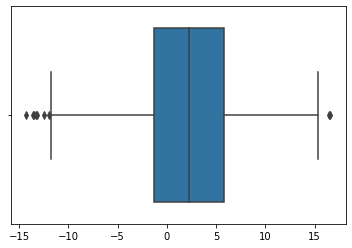

In [4]:
sns.boxplot(np.random.normal(2, 5, size=1000))
plt.show()

In [5]:
df = pd.DataFrame({
    'numerical': np.random.normal(size=1000),
    'categorical': np.random.choice(['a', 'b', 'c'], size=1000),
    'ordinal': np.random.choice([1, 2, 3, 4, 5], size=1000)
})

df.head()

,numerical,categorical,ordinal
0,-0.821136,c,4
1,0.246992,b,3
2,-0.326818,b,2
3,-1.632637,b,4
4,1.166084,a,2


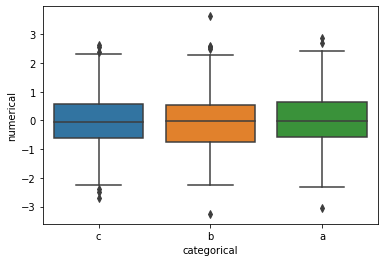

In [8]:
sns.boxplot(y='numerical', x='categorical', data=df)
plt.show()

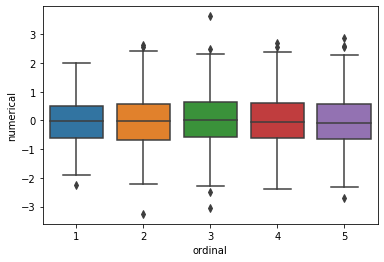

In [9]:
sns.boxplot(y='numerical', x='ordinal', data=df)
plt.show()

# 3.4 Inferential Statistics

## 3.4.1 T-Tests

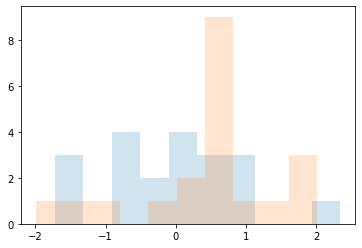

In [13]:
samples_a = np.random.normal(size=20)
samples_b = np.random.normal(0.2, 1, size=20)

plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [14]:
scipy.stats.ttest_ind(samples_a, samples_b).pvalue

0.08998228521755153

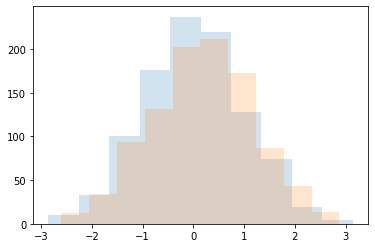

In [15]:
samples_a = np.random.normal(size=1000)
samples_b = np.random.normal(0.2, 1, size=1000)

plt.hist(samples_a, alpha=0.2)
plt.hist(samples_b, alpha=0.2)
plt.show()

In [16]:
scipy.stats.ttest_ind(samples_a, samples_b).pvalue

0.0001258415067219417

## 3.4.2 Correlation Matrix

In [3]:
x = np.random.rand(500,)
y = x * 2 + np.random.normal(0, 0.3, 500)
z = np.random.rand(500,)

df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

df.head()

,x,y,z
0,0.340547,0.822597,0.404956
1,0.731283,1.591233,0.988758
2,0.133838,0.362626,0.578230
3,0.501511,1.157826,0.775191
4,0.183218,0.323760,0.382638


In [4]:
df.corr()

,x,y,z
x,1.000000,0.889886,-0.017365
y,0.889886,1.000000,0.008979
z,-0.017365,0.008979,1.000000


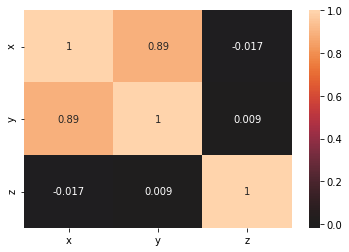

In [5]:
sns.heatmap(df.corr(), center=0, annot=True)
bottom, top = plt.ylim()
plt.ylim(bottom + 0.5, top - 0.5)

plt.show()

## 3.4.3 Statistical and Machine Learning Models

In [8]:
model = linear_model.LinearRegression()
model.fit(df[['x', 'z']], df['y'])
model.coef_

array([1.98861194, 0.05436268])

In [11]:
model.predict([[1, 2], [2, 3]])

array([2.10790143, 4.15087605])